<a href="https://colab.research.google.com/github/lansiLatheef/Consumer-behaviour-analysis---WiDS/blob/main/Consumer_Behaviour_Analysis_WiDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.cluster.hierarchy as shc

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import cluster
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.utils import shuffle


In [108]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__)

5.5.0


In [111]:
import cufflinks as cf

In [112]:
cf.go_offline(connected=True)
cf.set_config_file(offline=False, world_readable=True)

Import csv in colab as DataFrames (df) 

In [113]:
#importing file
df = pd.read_csv('/Wids_Consumer_Behaviour.csv')

Preview top 5 rows of df 

In [114]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kids,Teen,Customer_Dt,Last_purchase,Wines,...,CatalogPurchases,StorePurchases,WebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1964,Graduation,Single,58138.0,0,0,04-09-2019,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1961,Graduation,Single,46344.0,1,1,08-03-2021,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1972,Graduation,Together,71613.0,0,0,21-08-2020,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1991,Graduation,Together,26646.0,1,0,10-02-2021,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1988,PhD,Married,58293.0,1,0,19-01-2021,94,173,...,3,6,5,0,0,0,0,0,0,0


Check basic statistics of df

In [115]:
df.describe()

,ID,Year_Birth,Income,Kids,Teen,Last_purchase,Wines,Fruits,MeatProducts,FishProducts,...,CatalogPurchases,StorePurchases,WebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1975.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1900.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1966.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1977.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1984.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,2003.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check basic info of df

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2216 non-null   float64
 5   Kids               2240 non-null   int64  
 6   Teen               2240 non-null   int64  
 7   Customer_Dt        2240 non-null   object 
 8   Last_purchase      2240 non-null   int64  
 9   Wines              2240 non-null   int64  
 10  Fruits             2240 non-null   int64  
 11  MeatProducts       2240 non-null   int64  
 12  FishProducts       2240 non-null   int64  
 13  SweetProducts      2240 non-null   int64  
 14  GoldProds          2240 non-null   int64  
 15  NumDealsPurchases  2240 non-null   int64  
 16  WebPurchases       2240 

Check the number of Null values in each row

In [117]:
#filling the null values
df.isnull().sum()

ID                    0
Year_Birth            0
Education             0
Marital_Status        0
Income               24
Kids                  0
Teen                  0
Customer_Dt           0
Last_purchase         0
Wines                 0
Fruits                0
MeatProducts          0
FishProducts          0
SweetProducts         0
GoldProds             0
NumDealsPurchases     0
WebPurchases          0
CatalogPurchases      0
StorePurchases        0
WebVisitsMonth        0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Complain              0
Response              0
dtype: int64

In [118]:
sum(df.Income.isnull())

24

Fill Null values

In [119]:


df['Income'].fillna(value = df['Income'].mean(),inplace = True)


In [120]:
sum(df.Income.isnull())

0

In [121]:
 df['Marital_Status'].value_counts( )


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

(Create plots to indicate different values before converting

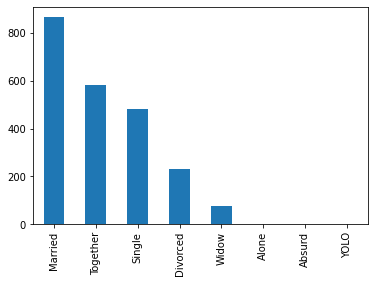

In [122]:
df['Marital_Status'].value_counts( ).plot(kind ='bar')

In [123]:
df1=df.copy()

Change the values of Marital_Status,Education such that it consists of only 2 unique values

In [124]:
df1['Marital_Status'].replace(['Single','Divorced','Widow','Alone'], 'without family',inplace=True)
df1['Marital_Status'].replace(['Married','Together'],'with family', inplace = True)

In [125]:
df1.drop(df[df['Marital_Status'] == 'Absurd'].index, inplace = True)
df1.drop(df[df['Marital_Status'] == 'YOLO'].index, inplace = True)


In [126]:
df1['Marital_Status'].value_counts( )


with family       1444
without family     792
Name: Marital_Status, dtype: int64

Reduce the number of columns by combining columns like kids and teen,columns of expenses into 1,etc

In [127]:
df1['Kids_and_Teen'] = (df1['Kids']+df1['Teen'])
df1['Total_Purchases'] =df1['StorePurchases']+df1['CatalogPurchases']
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kids,Teen,Customer_Dt,Last_purchase,Wines,...,WebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases
0,5524,1964,Graduation,without family,58138.0,0,0,04-09-2019,58,635,...,7,0,0,0,0,0,0,1,0,14
1,2174,1961,Graduation,without family,46344.0,1,1,08-03-2021,38,11,...,5,0,0,0,0,0,0,0,2,3
2,4141,1972,Graduation,with family,71613.0,0,0,21-08-2020,26,426,...,4,0,0,0,0,0,0,0,0,12
3,6182,1991,Graduation,with family,26646.0,1,0,10-02-2021,26,11,...,6,0,0,0,0,0,0,0,1,4
4,5324,1988,PhD,with family,58293.0,1,0,19-01-2021,94,173,...,5,0,0,0,0,0,0,0,1,9


In [128]:
df1.drop(['Kids','Teen'], axis = 1, inplace= True)

In [129]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Customer_Dt,Last_purchase,Wines,Fruits,MeatProducts,...,WebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases
0,5524,1964,Graduation,without family,58138.0,04-09-2019,58,635,88,546,...,7,0,0,0,0,0,0,1,0,14
1,2174,1961,Graduation,without family,46344.0,08-03-2021,38,11,1,6,...,5,0,0,0,0,0,0,0,2,3
2,4141,1972,Graduation,with family,71613.0,21-08-2020,26,426,49,127,...,4,0,0,0,0,0,0,0,0,12
3,6182,1991,Graduation,with family,26646.0,10-02-2021,26,11,4,20,...,6,0,0,0,0,0,0,0,1,4
4,5324,1988,PhD,with family,58293.0,19-01-2021,94,173,43,118,...,5,0,0,0,0,0,0,0,1,9


In [130]:
df1['Total_expenses'] =df1['Wines']+df1['Fruits']+df1['MeatProducts']+df1['FishProducts']+df1['SweetProducts']+df1['GoldProds']

In [131]:
df1.drop(['Wines','Fruits','MeatProducts','FishProducts','SweetProducts','GoldProds'], axis = 1, inplace= True)


In [132]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Customer_Dt,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses
0,5524,1964,Graduation,without family,58138.0,04-09-2019,58,3,8,10,...,0,0,0,0,0,0,1,0,14,1617
1,2174,1961,Graduation,without family,46344.0,08-03-2021,38,2,1,1,...,0,0,0,0,0,0,0,2,3,27
2,4141,1972,Graduation,with family,71613.0,21-08-2020,26,1,8,2,...,0,0,0,0,0,0,0,0,12,776
3,6182,1991,Graduation,with family,26646.0,10-02-2021,26,2,2,0,...,0,0,0,0,0,0,0,1,4,53
4,5324,1988,PhD,with family,58293.0,19-01-2021,94,5,5,3,...,0,0,0,0,0,0,0,1,9,422


Change the column Customer_Dt to days and date of birth to age, format assuming the data to be till 01-01-2022

In [133]:
from datetime import date

In [134]:
df1['today'] = "01-01-2022"
df1['Customer_Dt'] = df1['Customer_Dt'].apply(pd.to_datetime)
df1['today'] = df1['today'].apply(pd.to_datetime)


In [135]:
df1['Days'] = (df1['today']-df1['Customer_Dt']).dt.days


In [136]:
df1.drop(['today','Customer_Dt'], axis = 1, inplace= True)


In [137]:
df1['today'] = 2022
df1['Age'] = (df1['today'])-df1['Year_Birth']


In [138]:
df1.drop('today', axis = 1, inplace= True)
df1.drop('Year_Birth', axis = 1, inplace= True)

In [139]:
df1.head(1)


,ID,Education,Marital_Status,Income,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses,Days,Age
0,5524,Graduation,without family,58138.0,58,3,8,10,4,7,...,0,0,0,0,1,0,14,1617,998,58


In [140]:
df1.iloc[:,[0,20,1,2,21,17,3,19,4,5,6,7,8,9,18,10,11,12,13,14,15,16]]
df1


,ID,Education,Marital_Status,Income,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses,Days,Age
0,5524,Graduation,without family,58138.0,58,3,8,10,4,7,...,0,0,0,0,1,0,14,1617,998,58
1,2174,Graduation,without family,46344.0,38,2,1,1,2,5,...,0,0,0,0,0,2,3,27,151,61
2,4141,Graduation,with family,71613.0,26,1,8,2,10,4,...,0,0,0,0,0,0,12,776,498,50
3,6182,Graduation,with family,26646.0,26,2,2,0,4,6,...,0,0,0,0,0,1,4,53,91,31
4,5324,PhD,with family,58293.0,94,5,5,3,6,5,...,0,0,0,0,0,1,9,422,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,with family,61223.0,46,2,9,3,4,5,...,0,0,0,0,0,1,7,1341,567,48
2236,4001,PhD,with family,64014.0,56,7,8,2,5,7,...,0,1,0,0,0,3,7,444,87,69
2237,7270,Graduation,without family,56981.0,91,1,2,3,13,6,...,0,0,0,0,0,0,16,1241,341,34
2238,8235,Master,with family,69245.0,8,2,6,5,10,3,...,0,0,0,0,0,1,15,843,342,59


Remove the outliers using the Interquartile Range Method 

In [141]:
#using the Interquartile Range Method
Q1 = np.percentile(df1['Last_purchase'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['Last_purchase'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [142]:
 
# Upper bound
upper = np.where(df1['Last_purchase'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df1['Last_purchase'] <= (Q1-1.5*IQR))

In [143]:
#Removing the Outliers
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)


In [144]:
df1.shape 

(2236, 22)

In [145]:
#using the Interquartile Range Method
Q1 = np.percentile(df1['Total_expenses'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['Total_expenses'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [146]:
# Upper bound
upper = np.where(df1['Total_expenses'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df1['Total_expenses'] <= (Q1-1.5*IQR))

In [147]:
#Removing the Outliers
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

In [148]:
df1.shape

(2233, 22)

In [149]:
#using the Interquartile Range Method
Q1 = np.percentile(df1['Total_Purchases'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df1['Total_Purchases'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [150]:
# Upper bound
upper = np.where(df1['Total_Purchases'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df1['Total_Purchases'] <= (Q1-1.5*IQR))

In [151]:
#Removing the Outliers
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)

In [152]:
df1.shape

(2230, 22)

Label Encode the categorical values using one-hot encoding or pandas dummies

In [153]:
# label encoding  
label_encoder = preprocessing.LabelEncoder() 
df1['Marital_Status']= label_encoder.fit_transform(df1['Marital_Status']) 
df1['Education']= label_encoder.fit_transform(df1['Education']) 
df1.head(5)

,ID,Education,Marital_Status,Income,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses,Days,Age
0,5524,2,1,58138.0,58,3,8,10,4,7,...,0,0,0,0,1,0,14,1617,998,58
1,2174,2,1,46344.0,38,2,1,1,2,5,...,0,0,0,0,0,2,3,27,151,61
2,4141,2,0,71613.0,26,1,8,2,10,4,...,0,0,0,0,0,0,12,776,498,50
3,6182,2,0,26646.0,26,2,2,0,4,6,...,0,0,0,0,0,1,4,53,91,31
4,5324,4,0,58293.0,94,5,5,3,6,5,...,0,0,0,0,0,1,9,422,347,34


In [154]:
df1['Education'].value_counts()

2    1123
4     483
3     367
0     203
1      54
Name: Education, dtype: int64

In [155]:
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(name_mapping)

{'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}


Make the Correlation Matrix between all the attributes

In [156]:
corr_matrix = df1.corr().abs()
corr_matrix

,ID,Education,Marital_Status,Income,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses,Days,Age
ID,1.000000,0.003006,0.019839,0.016528,0.047486,0.034375,0.019190,0.002953,0.014988,0.008553,...,0.006830,0.021009,0.015164,0.033897,0.023791,0.001413,0.007553,0.015215,0.003811,0.000388
Education,0.003006,1.000000,0.011442,0.117472,0.008485,0.025803,0.081898,0.070441,0.070846,0.040164,...,0.033693,0.009124,0.021641,0.050429,0.090702,0.054665,0.080182,0.091273,0.068208,0.173315
Marital_Status,0.019839,0.011442,1.000000,0.006484,0.007303,0.024862,0.001595,0.012809,0.008902,0.002562,...,0.023054,0.008850,0.003029,0.005441,0.148113,0.037172,0.001340,0.015254,0.006305,0.006016
Income,0.016528,0.117472,0.006484,1.000000,0.001301,0.089691,0.385353,0.600415,0.529695,0.550357,...,0.332372,0.274997,0.088546,0.027118,0.130832,0.287413,0.638368,0.665977,0.019528,0.167874
Last_purchase,0.047486,0.008485,0.007303,0.001301,1.000000,0.004150,0.010100,0.029932,0.001046,0.021409,...,0.000768,0.021276,0.001984,0.013092,0.198677,0.017254,0.016411,0.023013,0.032658,0.018999
NumDealsPurchases,0.034375,0.025803,0.024862,0.089691,0.004150,1.000000,0.247366,0.060384,0.081659,0.365938,...,0.182702,0.122485,0.037757,0.001045,0.005801,0.452122,0.017805,0.074629,0.197699,0.066441
WebPurchases,0.019190,0.081898,0.001595,0.385353,0.010100,0.247366,1.000000,0.405262,0.502323,0.060872,...,0.139947,0.154409,0.034164,0.016418,0.147375,0.147880,0.518881,0.527839,0.171717,0.144822
CatalogPurchases,0.002953,0.070441,0.012809,0.600415,0.029932,0.060384,0.405262,1.000000,0.550802,0.523211,...,0.330554,0.314950,0.105034,0.020232,0.228291,0.449189,0.861790,0.794023,0.086449,0.138945
StorePurchases,0.014988,0.070846,0.008902,0.529695,0.001046,0.081659,0.502323,0.550802,1.000000,0.432363,...,0.210472,0.181917,0.085425,0.016552,0.035914,0.320940,0.898057,0.679152,0.106258,0.130697
WebVisitsMonth,0.008553,0.040164,0.002562,0.550357,0.021409,0.365938,0.060872,0.523211,0.432363,1.000000,...,0.273788,0.191685,0.007757,0.019435,0.002102,0.416128,0.538525,0.496817,0.252502,0.128545


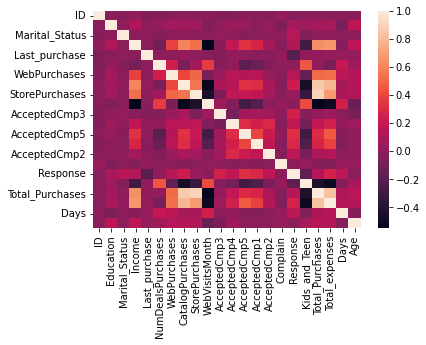

In [157]:
sns.heatmap(df1.corr())

In [158]:
 upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

drop columns with high correlation


In [159]:
    ##dropping columns with high correlation
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    df1.drop(df.columns[to_drop], axis=1, inplace= True)
    df1.head()

,ID,Education,Marital_Status,Income,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses,Days,Age
0,5524,2,1,58138.0,58,3,8,10,4,7,...,0,0,0,0,1,0,14,1617,998,58
1,2174,2,1,46344.0,38,2,1,1,2,5,...,0,0,0,0,0,2,3,27,151,61
2,4141,2,0,71613.0,26,1,8,2,10,4,...,0,0,0,0,0,0,12,776,498,50
3,6182,2,0,26646.0,26,2,2,0,4,6,...,0,0,0,0,0,1,4,53,91,31
4,5324,4,0,58293.0,94,5,5,3,6,5,...,0,0,0,0,0,1,9,422,347,34


make different type of plots

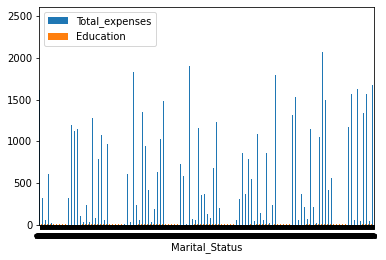

In [160]:
#Correlation between marital status and expenses with respect to education
df1.plot(kind ='bar', x='Marital_Status' , y =['Total_expenses','Education'])


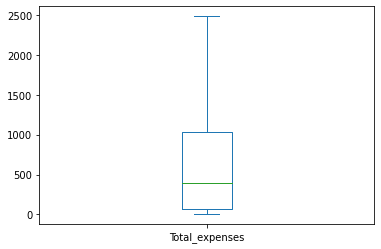

In [161]:
#education and expense
df1.plot(kind='box', x='Education',y='Total_expenses')

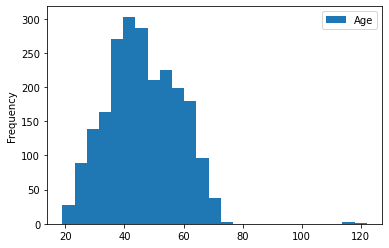

In [162]:
#distribution of age with respect to marital status
df1.plot(kind='hist',x ='Marital_Status',y= 'Age',bins=25)

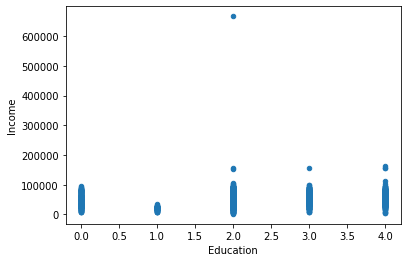

In [163]:
#income and education
df1.plot(kind='scatter', x='Education',y ='Income')

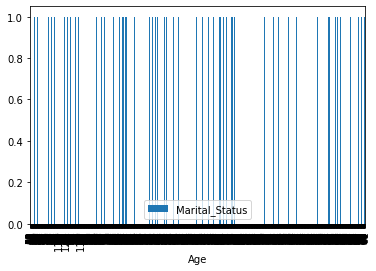

In [164]:
#distribution of age with respect to marital status
df1.plot(kind='bar',x='Age',y='Marital_Status')

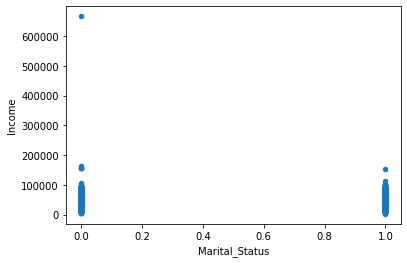

In [165]:
#income and marital status
df1.plot(kind='scatter',y= 'Income', x ='Marital_Status')

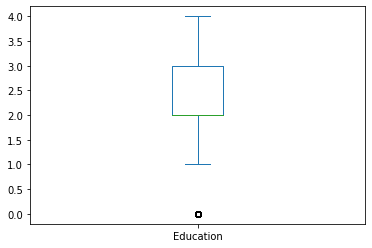

In [166]:
#people with respect to education
df1.plot(kind='box',y='Education',x='ID')

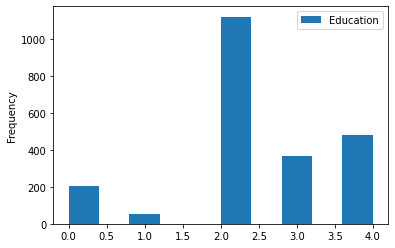

In [167]:
#distribution of the number of total purchases with respect to education
df1.plot(kind='hist',y='Education',x='Total_Purchases')

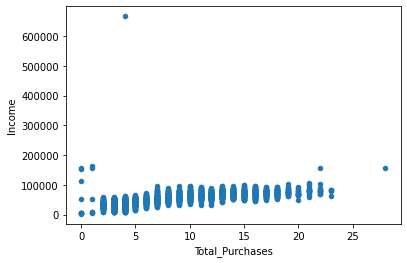

In [168]:
#distribution of the number of total purchases with respect to income
df1.plot(kind='scatter',x='Total_Purchases',y='Income')

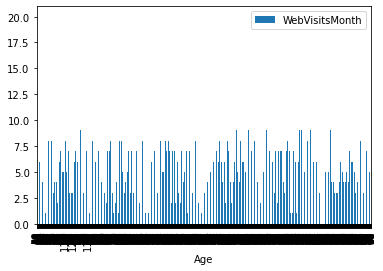

In [169]:
df1.plot(kind='bar',y='WebVisitsMonth',x='Age')

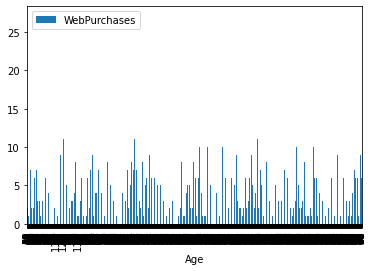

In [170]:
df1.plot(kind='bar',y='WebPurchases',x='Age')


Figure out which age category,income group is buying maximum from which mode (web,catalogue or store)

In [171]:
# Find the x value corresponding to the max y value
corresponding_ageweb = df1.loc[df['WebPurchases'] == df1.WebPurchases.max() ,'Age'].values[0]
print("maximum products from webpurchases are brought by people of age"),corresponding_ageweb


maximum products from webpurchases are brought by people of age


(None, 29)

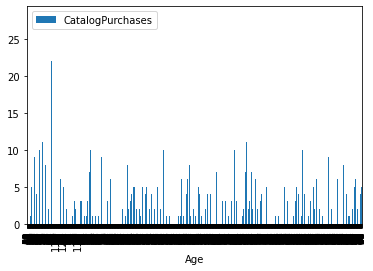

In [172]:
df1.plot(kind='bar',y='CatalogPurchases',x='Age')

In [173]:
 # Find the x value corresponding to the max y value
corresponding_agecatalog = df1.loc[df['CatalogPurchases'] == df1.CatalogPurchases.max() ,'Age'].values[0]
print("maximum products from catalogpurchases are brought by people of age"),corresponding_agecatalog

maximum products from catalogpurchases are brought by people of age


(None, 38)

In [174]:
df1['AcceptedCmp1'].value_counts()

0    2088
1     142
Name: AcceptedCmp1, dtype: int64

In [175]:
df1['AcceptedCmp2'].value_counts()

0    2200
1      30
Name: AcceptedCmp2, dtype: int64

In [176]:
df1['AcceptedCmp3'].value_counts()


0    2068
1     162
Name: AcceptedCmp3, dtype: int64

In [177]:
df1['AcceptedCmp4'].value_counts()

0    2063
1     167
Name: AcceptedCmp4, dtype: int64

In [178]:
df1['AcceptedCmp5'].value_counts()

0    2071
1     159
Name: AcceptedCmp5, dtype: int64

Which campaign was the most successful of the five that the company ran?

In [179]:
a=(df1['AcceptedCmp1'] == 1).sum()
b=(df1['AcceptedCmp2'] == 1).sum()
c=(df1['AcceptedCmp3'] == 1).sum()
d=(df1['AcceptedCmp4'] == 1).sum()
e=(df1['AcceptedCmp5'] == 1).sum()
maxi=max(a,b,c,d,e)

if maxi==a :
  print("Campaign 1 is most successful")
elif maxi==b :
  print("Campaign 2 is most successful")
elif maxi==c :
  print("Campaign 3 is most successful")
elif maxi==d :
  print("Campaign 4 is most successful")
else:
  print("Campaign 5 is most successful")

Campaign 4 is most successful


In [180]:
df1 .head(5)

,ID,Education,Marital_Status,Income,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses,Days,Age
0,5524,2,1,58138.0,58,3,8,10,4,7,...,0,0,0,0,1,0,14,1617,998,58
1,2174,2,1,46344.0,38,2,1,1,2,5,...,0,0,0,0,0,2,3,27,151,61
2,4141,2,0,71613.0,26,1,8,2,10,4,...,0,0,0,0,0,0,12,776,498,50
3,6182,2,0,26646.0,26,2,2,0,4,6,...,0,0,0,0,0,1,4,53,91,31
4,5324,4,0,58293.0,94,5,5,3,6,5,...,0,0,0,0,0,1,9,422,347,34


In [181]:
i=0
def AcceptedCmp(AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,i):
  for i in range(0,2230):
   if (df1['AcceptedCmp1'][i] ==1) or (df1['AcceptedCmp2'][i] ==1) or (df1['AcceptedCmp3'][i] ==1) or (df1['AcceptedCmp4'][i] ==1) or (df1['AcceptedCmp5'][i] ==1):
    return 1
    i+=1
   else: 
    return 0
    

df1['AcceptedCmp'] = AcceptedCmp('AcceptedCmp1'[i],'AcceptedCmp2'[i],'AcceptedCmp3'[i],'AcceptedCmp4'[i],'AcceptedCmp5'[i],i)
  

In [182]:
df1.head(25)


,ID,Education,Marital_Status,Income,Last_purchase,NumDealsPurchases,WebPurchases,CatalogPurchases,StorePurchases,WebVisitsMonth,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_and_Teen,Total_Purchases,Total_expenses,Days,Age,AcceptedCmp
0,5524,2,1,58138.000000,58,3,8,10,4,7,...,0,0,0,1,0,14,1617,998,58,0
1,2174,2,1,46344.000000,38,2,1,1,2,5,...,0,0,0,0,2,3,27,151,61,0
2,4141,2,0,71613.000000,26,1,8,2,10,4,...,0,0,0,0,0,12,776,498,50,0
3,6182,2,0,26646.000000,26,2,2,0,4,6,...,0,0,0,0,1,4,53,91,31,0
4,5324,4,0,58293.000000,94,5,5,3,6,5,...,0,0,0,0,1,9,422,347,34,0
5,7446,3,0,62513.000000,16,2,6,4,10,6,...,0,0,0,0,1,14,716,479,48,0
6,965,2,1,55635.000000,34,4,7,3,7,6,...,0,0,0,0,1,10,590,780,44,0
7,6177,4,0,33454.000000,32,2,4,0,4,8,...,0,0,0,0,1,4,169,514,30,0
8,4855,4,0,30351.000000,19,1,3,0,2,9,...,0,0,0,1,1,2,46,574,41,0
9,5899,4,0,5648.000000,68,1,1,0,0,20,...,0,0,0,0,2,0,49,294,65,0


In [183]:
df1.drop(['ID','NumDealsPurchases','WebPurchases','CatalogPurchases','StorePurchases','WebVisitsMonth','Response'], axis=1, inplace= True)

In [184]:
df1.shape

(2230, 16)

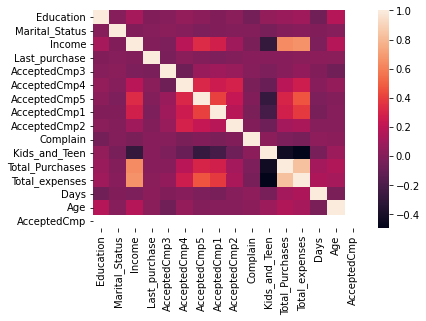

In [185]:
sns.heatmap(df1.corr())

In [186]:
df1.isnull().sum()

Education          0
Marital_Status     0
Income             0
Last_purchase      0
AcceptedCmp3       0
AcceptedCmp4       0
AcceptedCmp5       0
AcceptedCmp1       0
AcceptedCmp2       0
Complain           0
Kids_and_Teen      0
Total_Purchases    0
Total_expenses     0
Days               0
Age                0
AcceptedCmp        0
dtype: int64

In [211]:
autoscaler = StandardScaler()
autoscaler.fit_transform( df1[["Days", "Education",	"Marital_Status",	"Age",	"Kids_and_Teen","Income", "Total_expenses", "Total_Purchases"]])

array([[ 1.97879816, -0.34792694,  1.35010548, ...,  0.23964646,
         1.69715649,  1.04334339],
       [-1.66709238, -0.34792694,  1.35010548, ..., -0.23389087,
        -0.96170059, -1.01415426],
       [-0.17343947, -0.34792694, -0.74068287, ...,  0.78067711,
         0.29080504,  0.66925291],
       ...,
       [-0.84924208, -0.34792694,  1.35010548, ...,  0.1931921 ,
         1.06839532,  1.41743387],
       [-0.84493761,  0.54082114, -0.74068287, ...,  0.68560026,
         0.40284493,  1.23038863],
       [ 1.16525234,  1.42956923, -0.74068287, ...,  0.02809243,
        -0.7192262 , -0.64006378]])

Implement PCA to reduce the dimension(you can either fix the size or the variance

In [212]:
#Applying PCA
#Taking no. of Principal Components as 8
pca = PCA(n_components = 8)
pca.fit(df1)
data_pca = pca.transform(df1)
data_pca = pd.DataFrame(data_pca,columns=['Days',	'Education',	'Marital_Status',	'Age',	'Kids_and_Teen','Income','Total_expenses','Total_Purchases'])
data_pca.head()

,Days,Education,Marital_Status,Age,Kids_and_Teen,Income,Total_expenses,Total_Purchases
0,5984.061156,-975.898854,324.272090,5.798699,11.364097,1.523650,0.546301,-0.443646
1,-5833.706831,532.584364,-315.327917,-8.859116,14.966504,1.685517,0.647119,0.567353
2,19443.976853,140.983025,-16.809671,-22.746064,2.441041,-1.787638,0.589856,-0.783425
3,-25528.762394,204.203722,-427.126918,-21.532563,-13.565734,-0.357321,0.210805,-0.022775
4,6120.044874,302.301919,-148.207299,45.854016,-13.259752,-1.830466,-1.752146,-0.069225


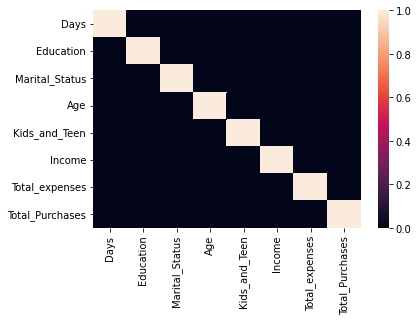

In [213]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

displaying the number of clusters on the x-axis and the SSE on the y-axis

Implement k-means clustering

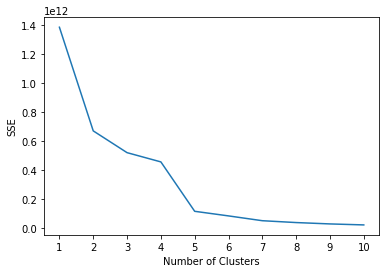

In [214]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [215]:
# the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(data_pca)

KMeans(init='random', n_clusters=3, random_state=1)

In [216]:
kmeans.labels_

array([2, 2, 1, ..., 2, 1, 2], dtype=int32)

In [217]:
#append cluster assingments to original DataFrame
data_pca['cluster_kmeans'] = kmeans.labels_

Heirarchial Clustering


In [218]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

data_linkage = linkage(data_pca, method='ward', metric='euclidean')
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data_pca)

Make 2-d plots and 3-d scatter plots of different features(education,income,marital status,etc) with respect to different clusters

In [219]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot

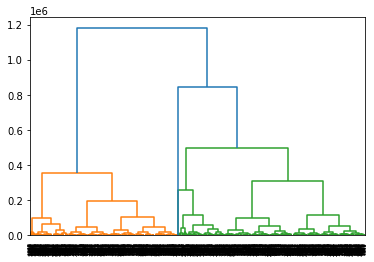

In [220]:
dendrogram(data_linkage)
plt.show()

Mean shift Clustering

In [198]:

# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.cluster import MeanShift

model = MeanShift()
# fit model and predict clusters
data_meanshift = model.fit_predict(data_pca)
# retrieve unique clusters
clusters = unique(data_meanshift)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(data_meanshift == cluster)

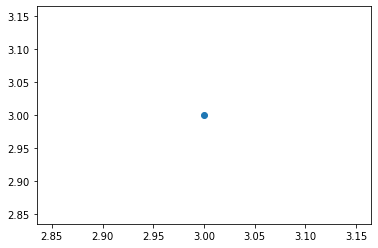

In [199]:
 # create scatter of these samples
 pyplot.scatter(data_meanshift[row_ix], data_meanshift[row_ix])
# show the plot
pyplot.show()

Gaussian Mixture Model Clustering

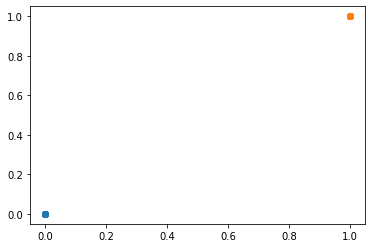

In [200]:
from sklearn.mixture import GaussianMixture

# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(data_pca)
# assign a cluster to each example
data_gmm = model.predict(data_pca)
# retrieve unique clusters
clusters = unique(data_gmm)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(data_gmm == cluster)
 # create scatter of these samples
 pyplot.scatter(data_gmm[row_ix], data_gmm[row_ix])
# show the plot
pyplot.show()

Apriori Association Algorithm to identify which two products are bought together

In [201]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:
from apyori import apriori

In [203]:
store_data = df[['Wines','Fruits','MeatProducts','FishProducts','SweetProducts','GoldProds']].copy()
store_data


,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [204]:
store_data.shape

(2240, 6)

In [205]:
#converting pandas dataframe into a list of lists
records = []
for i in range(0, 2240):
  records.append([str(store_data.values[i,j])for j in range(0, 6)])

In [206]:
#Building the apriori model
association_rules =apriori(records, min_support = 0.0045, min_confidence = 0.2, min_lift =3, min_length =2)
association_results = list(association_rules)
print(len(association_results))


4


In [207]:
print(association_results[0])

RelationRecord(items=frozenset({'12', '10', '2'}), support=0.005357142857142857, ordered_statistics=[OrderedStatistic(items_base=frozenset({'12', '10'}), items_add=frozenset({'2'}), confidence=0.6000000000000001, lift=3.1848341232227493)])


In [208]:
for item in association_results:

    # first index of the inner list Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))

Rule: 12 -> 10
Support: 0.005357142857142857
Confidence: 0.6000000000000001
Lift: 3.1848341232227493
Rule: 13 -> 8
Support: 0.005357142857142857
Confidence: 0.35294117647058826
Lift: 3.1125521074571565
Rule: 3 -> 1
Support: 0.007589285714285714
Confidence: 0.23611111111111113
Lift: 4.037319762510602
Rule: 3 -> 1
Support: 0.007142857142857143
Confidence: 0.6666666666666666
Lift: 4.194756554307116


In [209]:
AA_data = pd.concat([ df[['Customer_Dt','Income','ID']],df1[['Age']].copy() , df[['Wines','Fruits','MeatProducts','FishProducts','SweetProducts','GoldProds']].copy()])
AA_data

,Customer_Dt,Income,ID,Age,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds
0,04-09-2019,58138.0,5524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-03-2021,46344.0,2174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21-08-2020,71613.0,4141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10-02-2021,26646.0,6182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19-01-2021,58293.0,5324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2235,NaN,NaN,NaN,NaN,709.0,43.0,182.0,42.0,118.0,247.0
2236,NaN,NaN,NaN,NaN,406.0,0.0,30.0,0.0,0.0,8.0
2237,NaN,NaN,NaN,NaN,908.0,48.0,217.0,32.0,12.0,24.0
2238,NaN,NaN,NaN,NaN,428.0,30.0,214.0,80.0,30.0,61.0


In [210]:
AA_data.dropna(subset=['ID'], axis =0)
 
# To reset the indices
AA_data.reset_index(drop = True)
AA_data.shape

(6710, 10)